In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('telco.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


df['Gender'] = ['Male' if x == 0 else 'Female' for x in df['gender_Female']]


In [5]:
df = df.rename(columns={'gender': 'Gender', 'SeniorCitizen' : 'Senior Citizen', 'tenure' : 'Tenure', 'PhoneService' : 'Phone Service', 'MultipleLines' : 'Multiple Line', 'InternetService' : 'Internet Service', 
                        'OnlineSecurity' : 'Online Security', 'OnlineBackup' : 'Online Backup'})

In [6]:
print('Number of uniques values of Gender is {}'.format(df['Gender'].nunique()))
print('Number of uniques values of Senior Citizen is {}'.format(df['Senior Citizen'].nunique()))
print('Number of uniques values of Tenure is {}'.format(df['Tenure'].nunique()))
print('Number of uniques values of PaymentMethod is {}'.format(df['PaymentMethod'].nunique()))

Number of uniques values of Gender is 2
Number of uniques values of Senior Citizen is 2
Number of uniques values of Tenure is 73
Number of uniques values of PaymentMethod is 4


df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service', 'No')
df

In [7]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [8]:
df['TotalCharges'].dtype

dtype('float64')

In [9]:
df.dropna(how = 'any', inplace = True)
print(df.isnull().sum()/len(df)*100)

customerID          0.0
Gender              0.0
Senior Citizen      0.0
Partner             0.0
Dependents          0.0
Tenure              0.0
Phone Service       0.0
Multiple Line       0.0
Internet Service    0.0
Online Security     0.0
Online Backup       0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


In [10]:
df=df.drop(['customerID'],axis=1)

In [11]:
df['Senior Citizen'].value_counts()

Senior Citizen
0    5890
1    1142
Name: count, dtype: int64

In [12]:
df.dtypes

Gender               object
Senior Citizen        int64
Partner              object
Dependents           object
Tenure                int64
Phone Service        object
Multiple Line        object
Internet Service     object
Online Security      object
Online Backup        object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Line,Internet Service,Online Security,Online Backup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df['Senior Citizen'] = df['Senior Citizen'].astype(object)

In [15]:
df['Senior Citizen'] = df['Senior Citizen'].replace({1:'Yes', 0:'No'})

In [16]:
#define numerical & categorical columns
numeric_features = {feature for feature in df.columns if df[feature].dtype != 'O'}

categorical_features = {feature for feature in df.columns if df[feature].dtype == 'O'}

#print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : {'MonthlyCharges', 'TotalCharges', 'Tenure'}
We have 17 categorical features : {'Senior Citizen', 'Multiple Line', 'Contract', 'DeviceProtection', 'StreamingTV', 'PaymentMethod', 'Phone Service', 'TechSupport', 'PaperlessBilling', 'Internet Service', 'Dependents', 'StreamingMovies', 'Gender', 'Online Security', 'Online Backup', 'Partner', 'Churn'}


In [17]:
df.isnull().sum()

Gender              0
Senior Citizen      0
Partner             0
Dependents          0
Tenure              0
Phone Service       0
Multiple Line       0
Internet Service    0
Online Security     0
Online Backup       0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

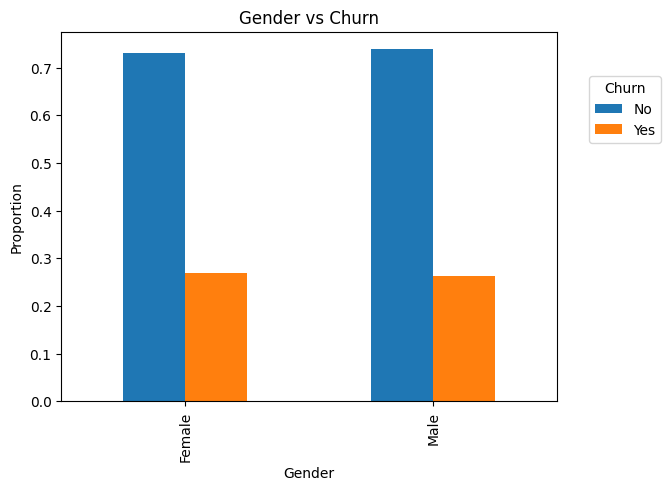

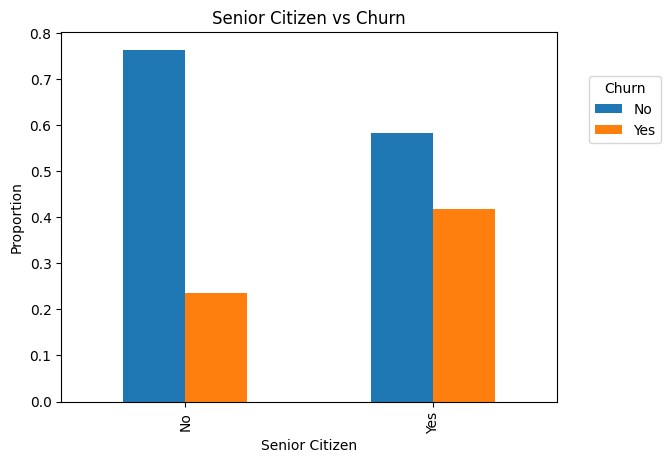

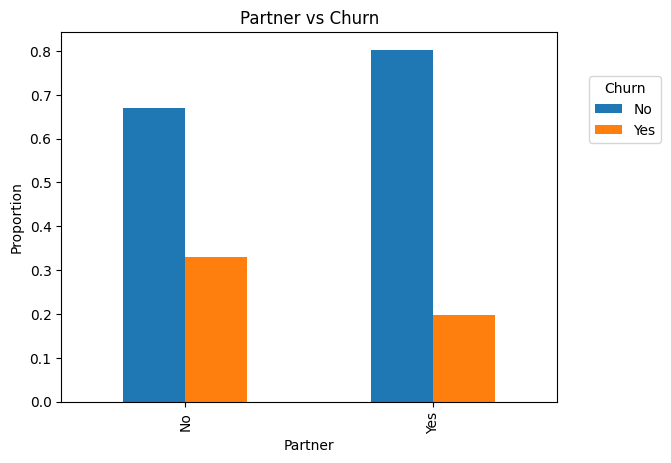

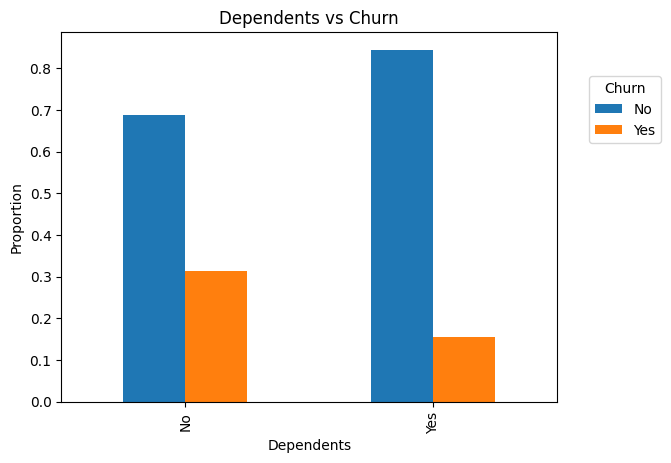

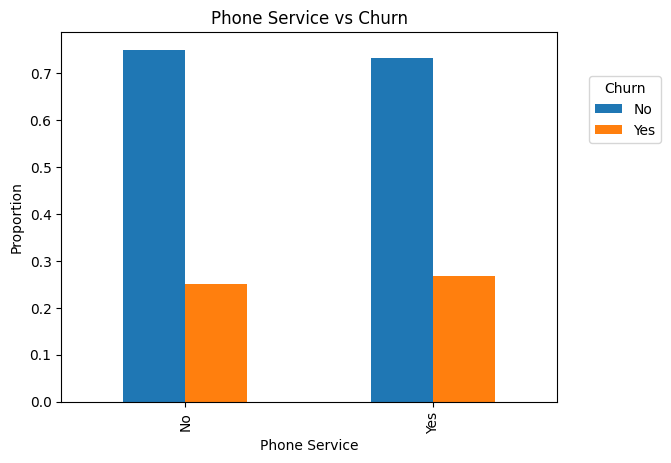

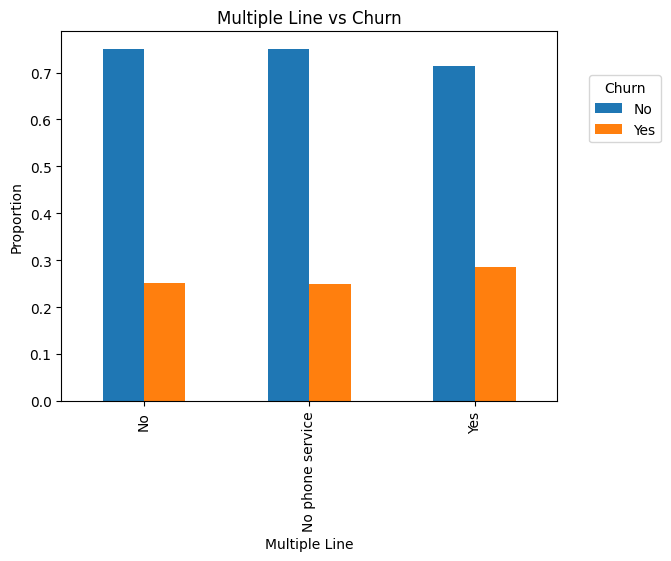

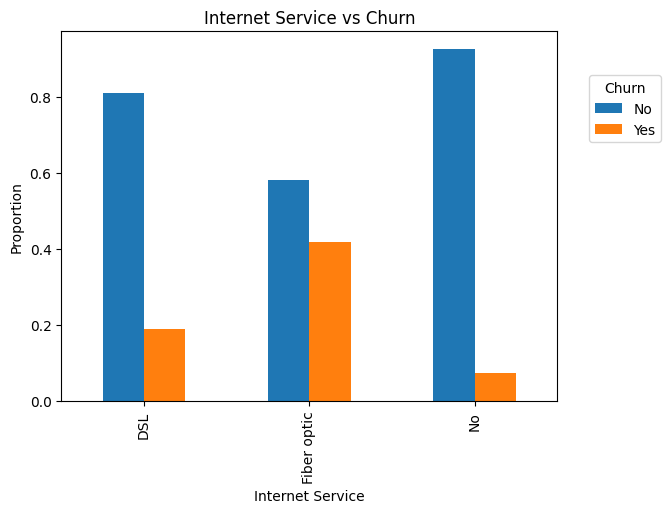

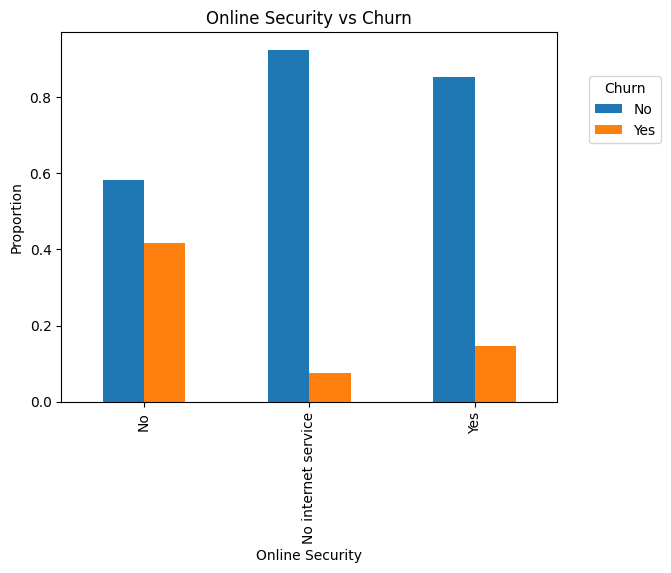

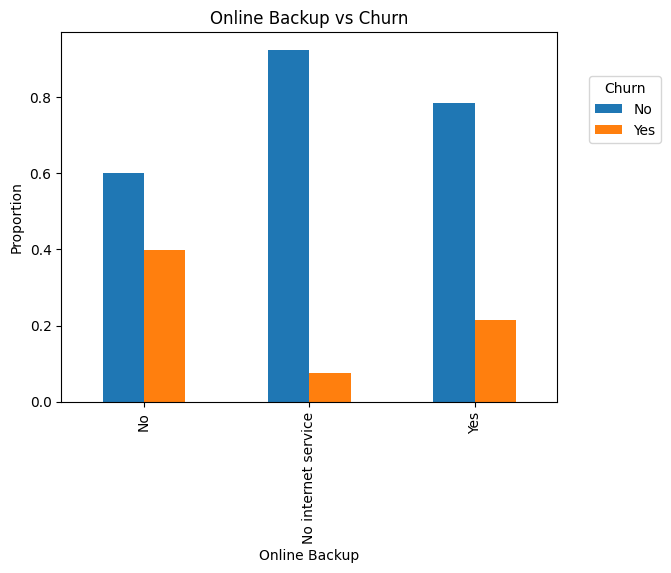

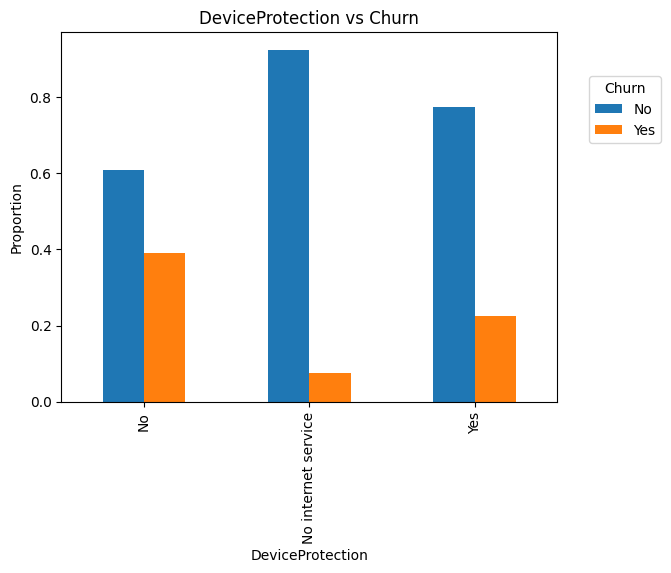

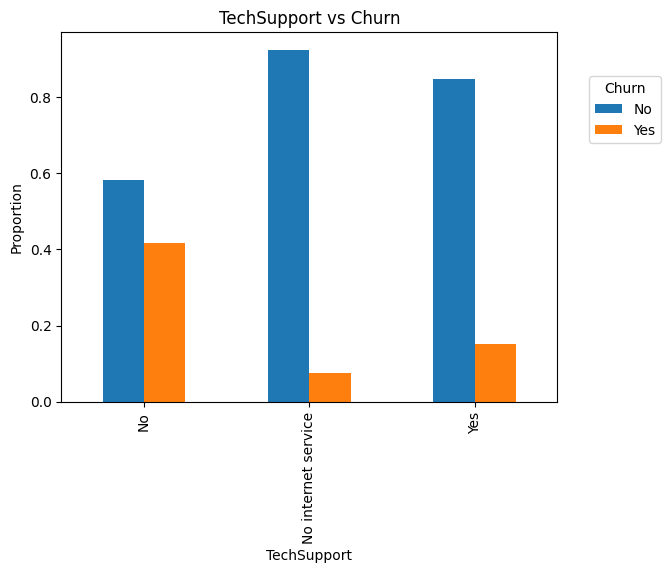

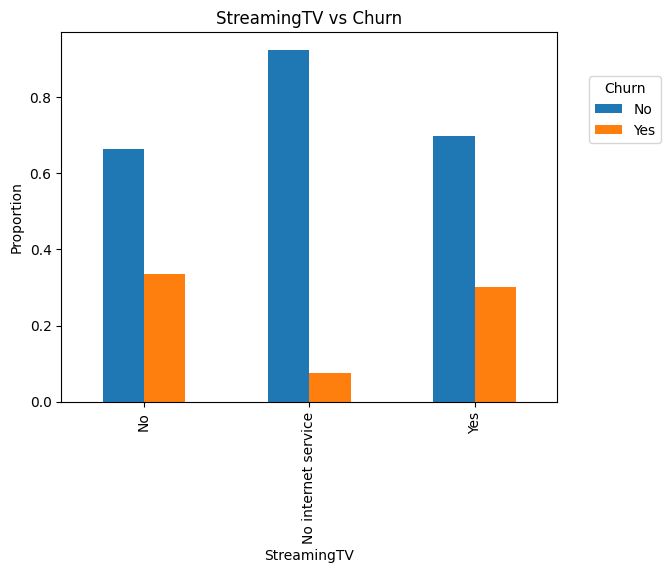

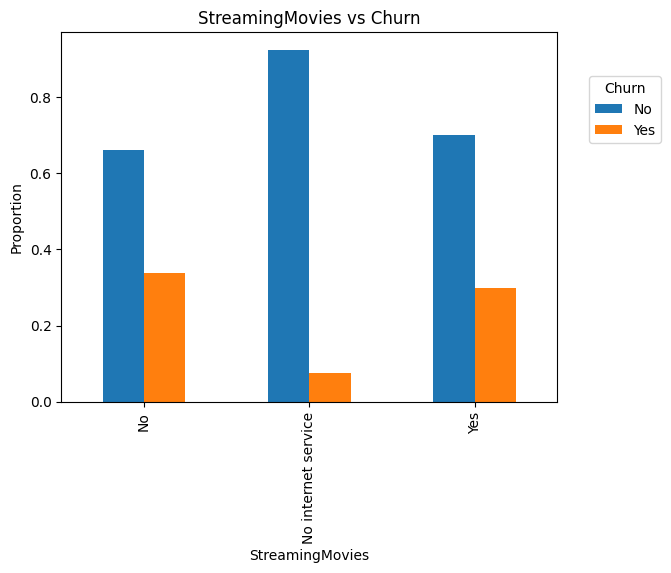

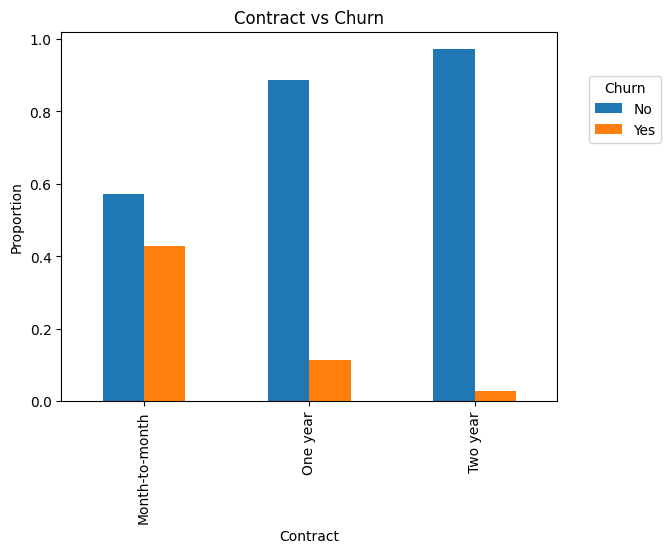

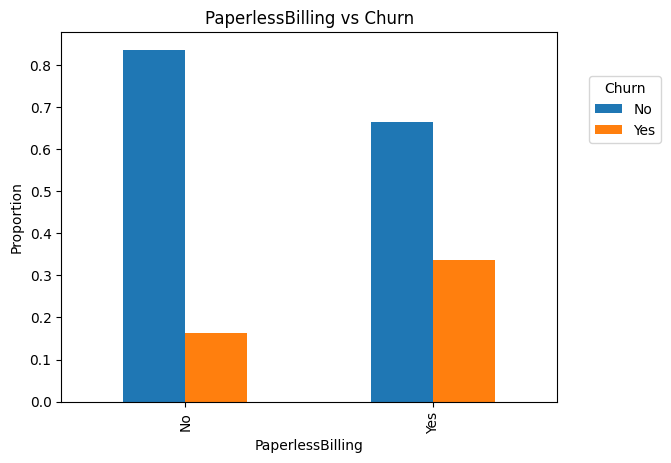

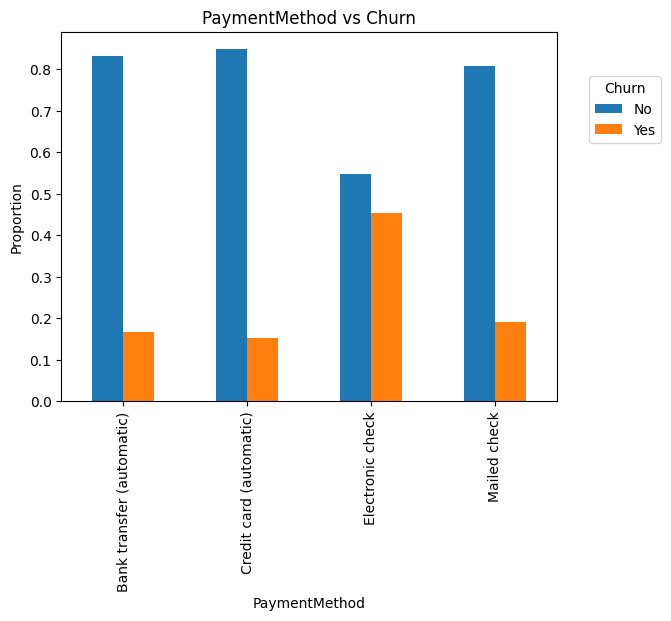

In [18]:
# Define the target variable
target = 'Churn'

# Iterate over each column and generate a separate bar chart for categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        if col != target:
            # Group the data by the categorical column and target variable
            groupby = df.groupby([col, target]).size().reset_index(name='count')
            
            # Pivot the data to create a stacked bar chart
            pivoted = groupby.pivot(index=col, columns=target, values='count')
            
            # Calculate the proportions and plot the bar chart
            proportions = pivoted.apply(lambda x: x / x.sum(), axis=1)
            ax = proportions.plot(kind='bar', stacked=False)
            
            # Add titles and labels
            ax.set_title(f'{col} vs {target}')
            ax.set_xlabel(col)
            ax.set_ylabel('Proportion')
            ax.legend(title=target, bbox_to_anchor=(1.05, 0.9), loc='upper left')
            
            plt.show()

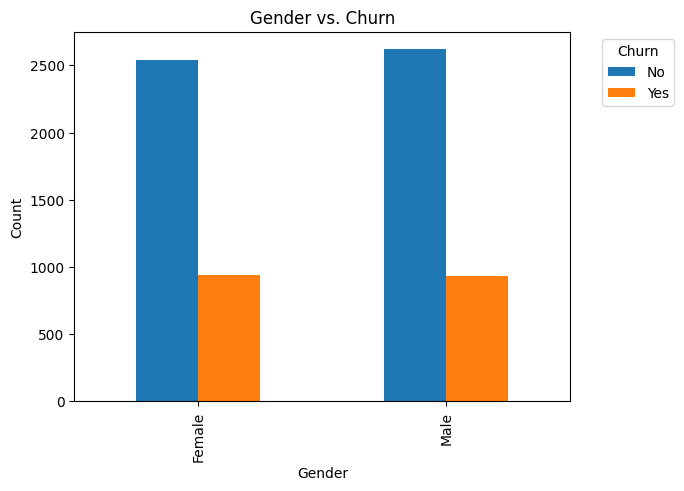

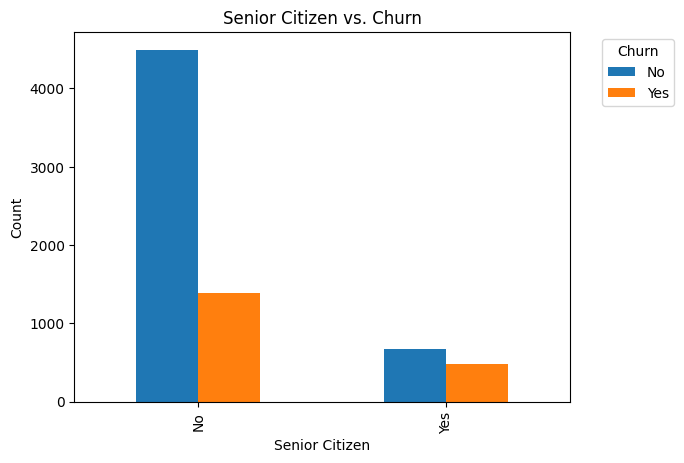

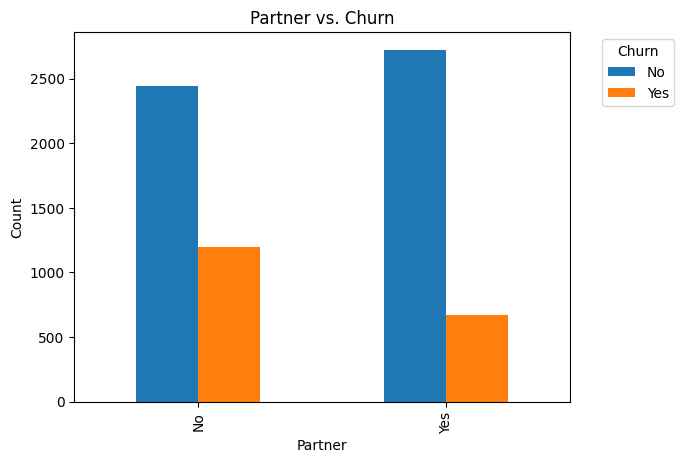

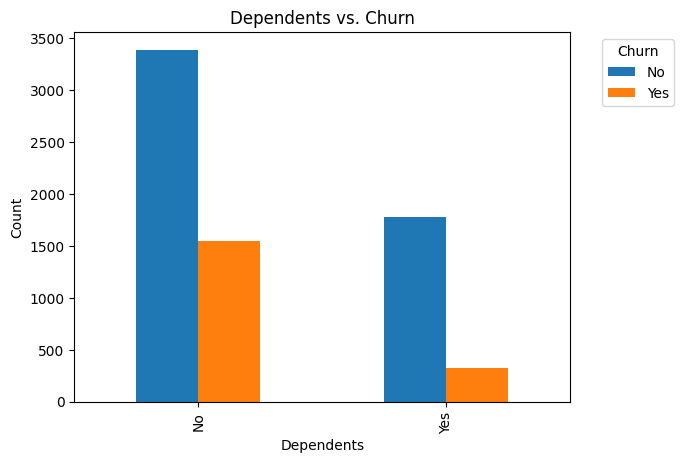

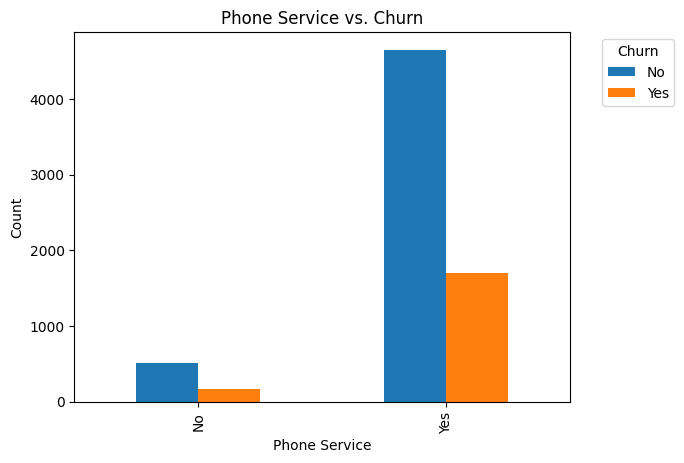

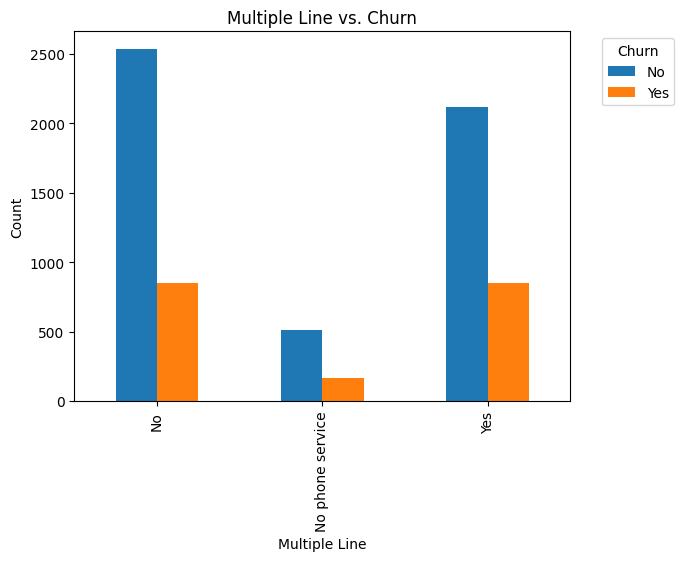

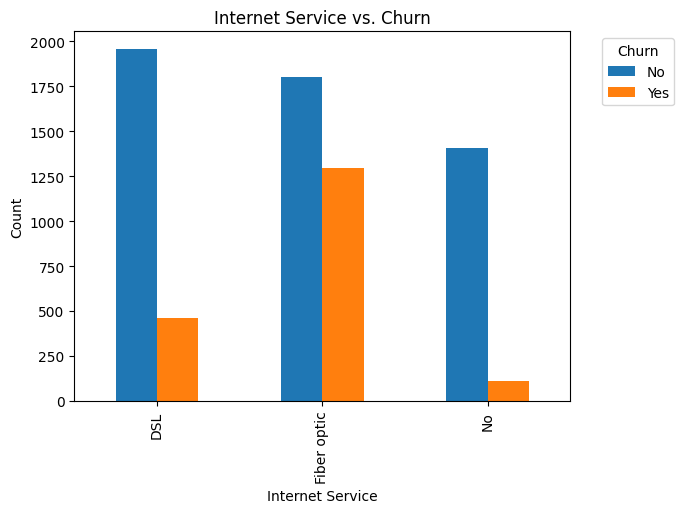

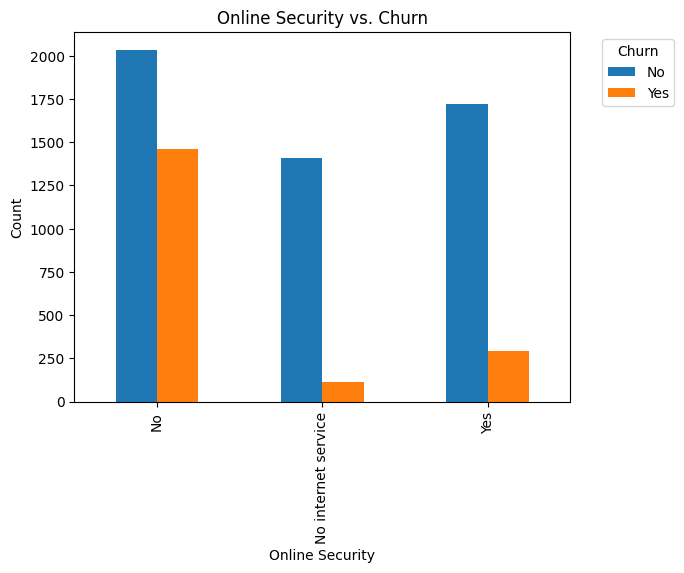

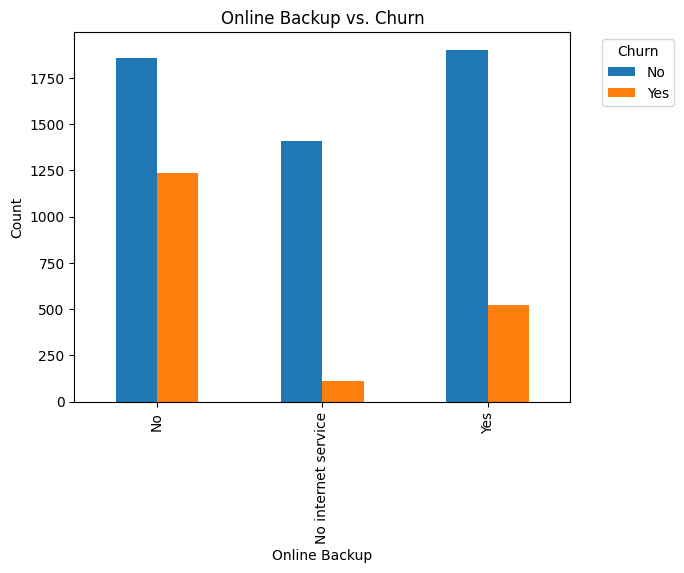

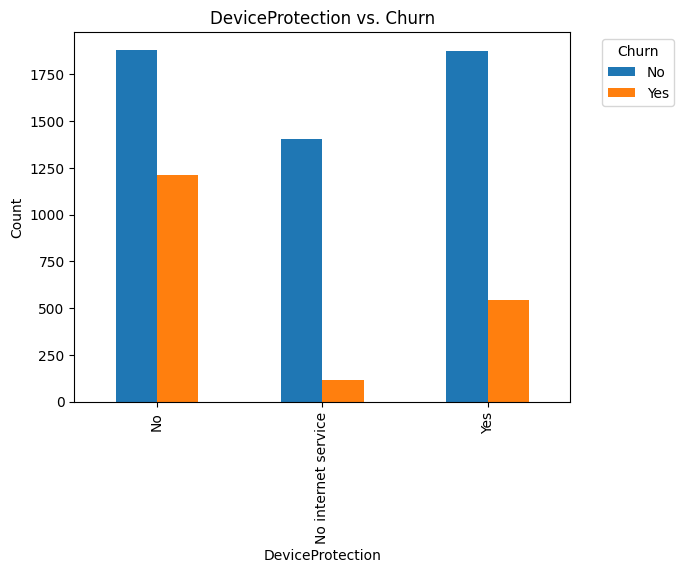

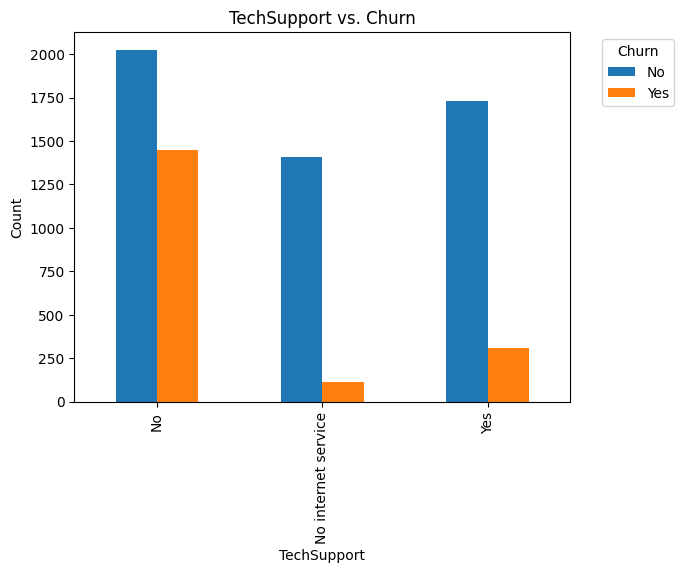

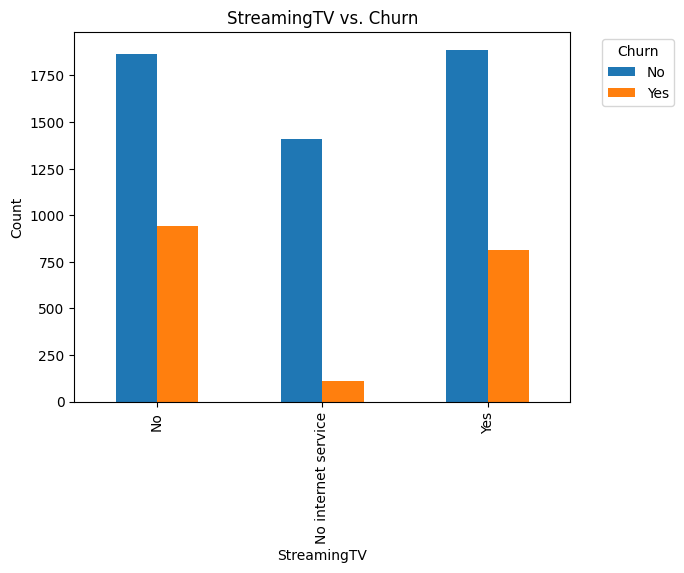

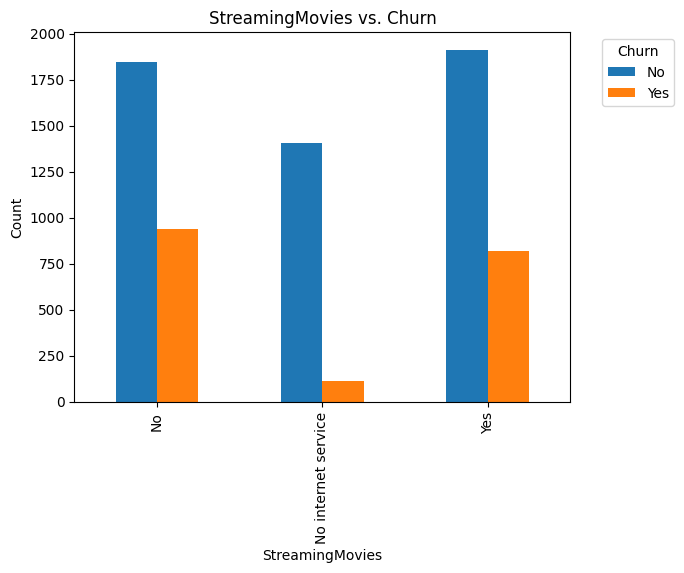

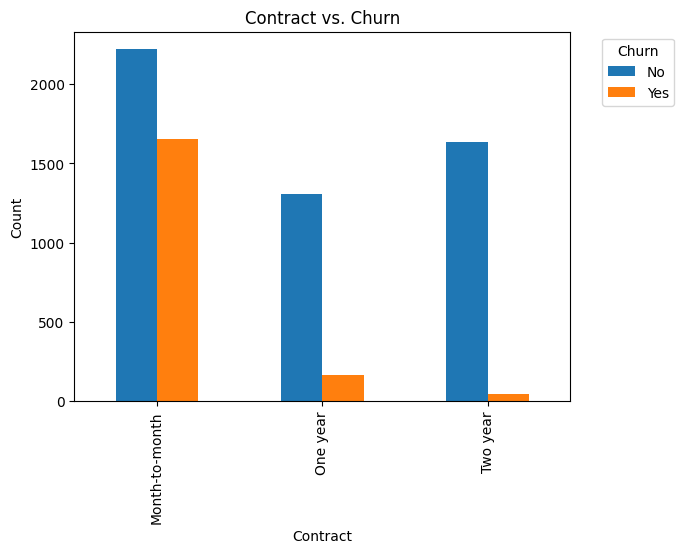

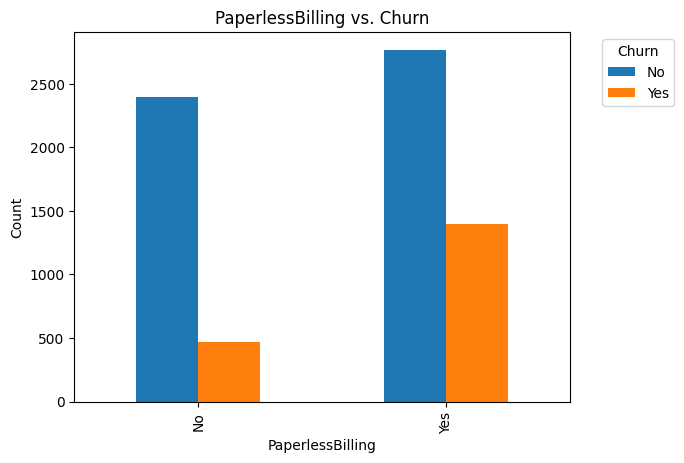

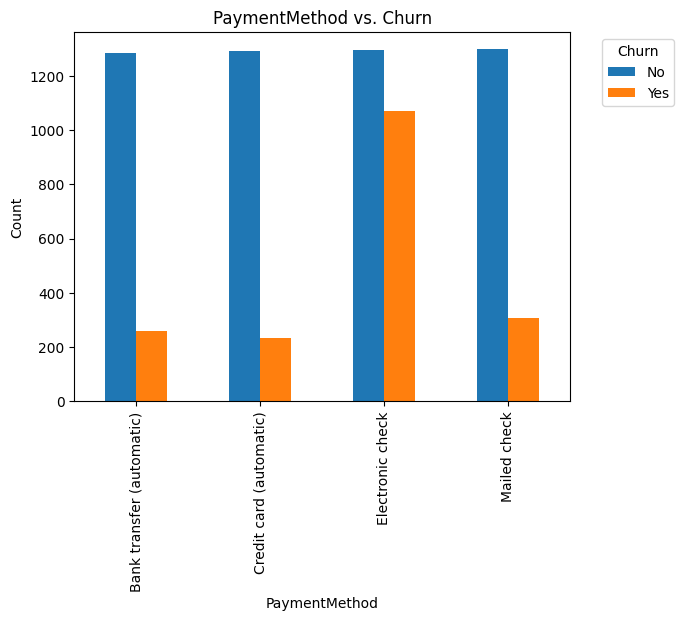

In [19]:
# Define the target variable
target = 'Churn'

# Iterate over each column and generate a separate bar chart for categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        if col != target:
            # Group the data by the categorical column and target variable
            groupby = df.groupby([col, target]).size().reset_index(name='count')       
         
            # Pivot the data to create a stacked bar chart
            pivoted = groupby.pivot(index=col, columns=target, values='count')
            
            # Plot the bar chart
            ax = pivoted.plot(kind='bar', stacked=False)
            
            # Add titles and labels
            ax.set_title(f'{col} vs. {target}')
            ax.set_xlabel(col)
            ax.set_ylabel('Count')
            ax.legend(title=target, bbox_to_anchor=(1.05, 1), loc='upper left')
            
            plt.show()


In [20]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Line,Internet Service,Online Security,Online Backup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
df.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure',
       'Phone Service', 'Multiple Line', 'Internet Service', 'Online Security',
       'Online Backup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
# Get the max tenure
print(df['Tenure'].max())

# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df['tenure group'] = pd.cut(df['Tenure'], range(1, 80, 12), right=False, labels=labels)

print(df['tenure group'].value_counts())

72
tenure group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

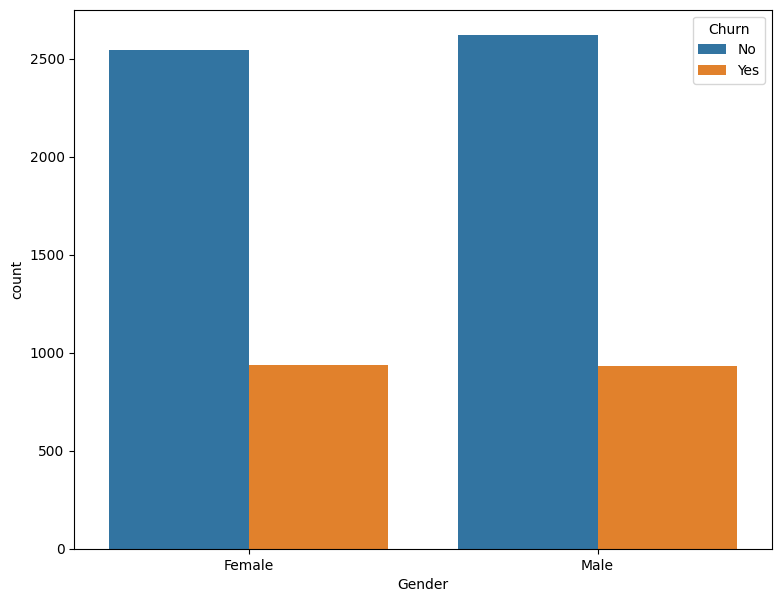

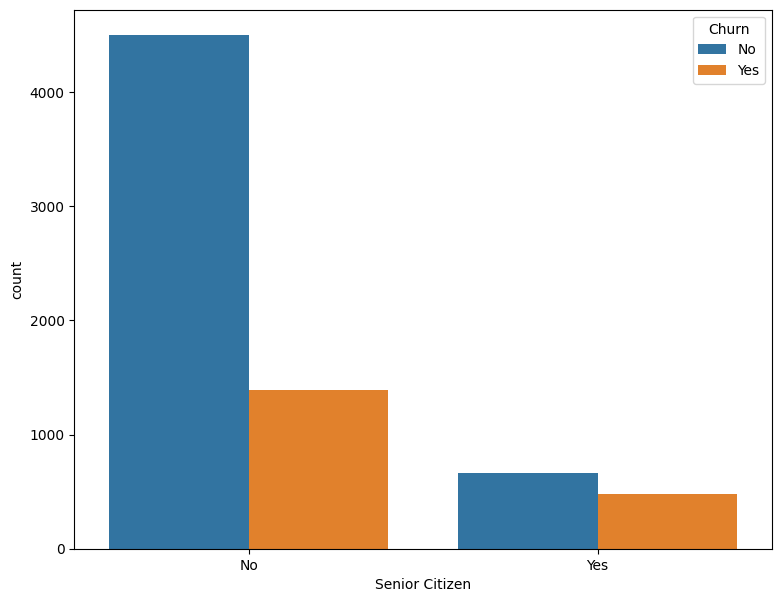

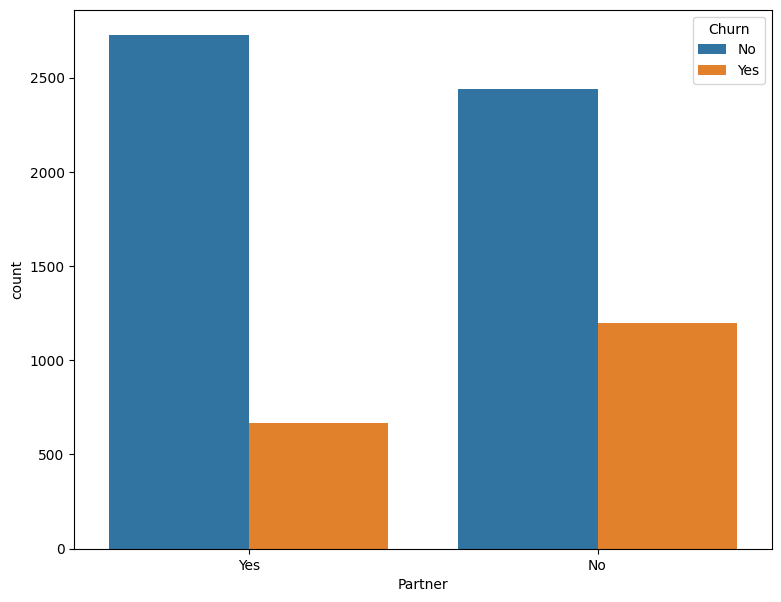

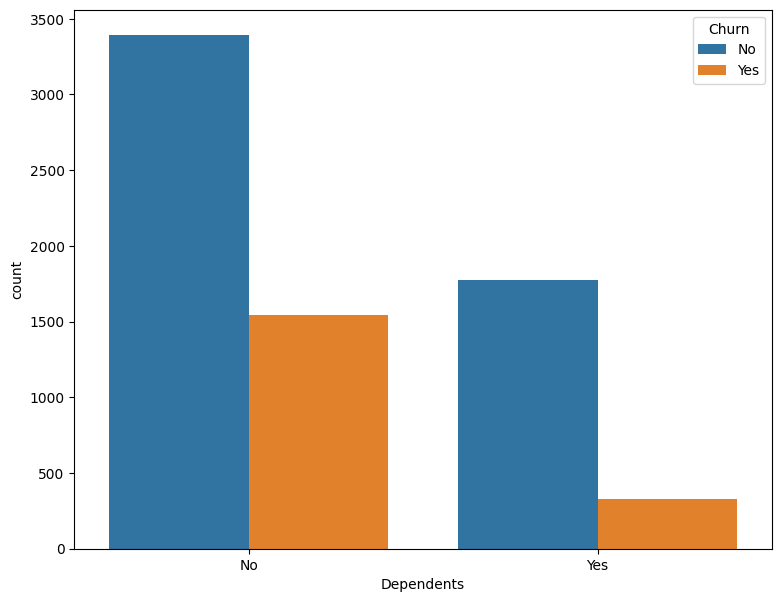

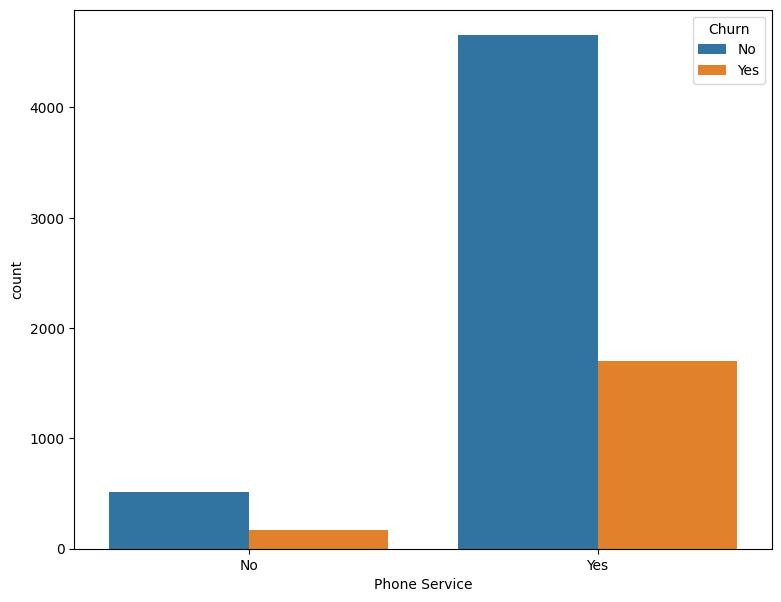

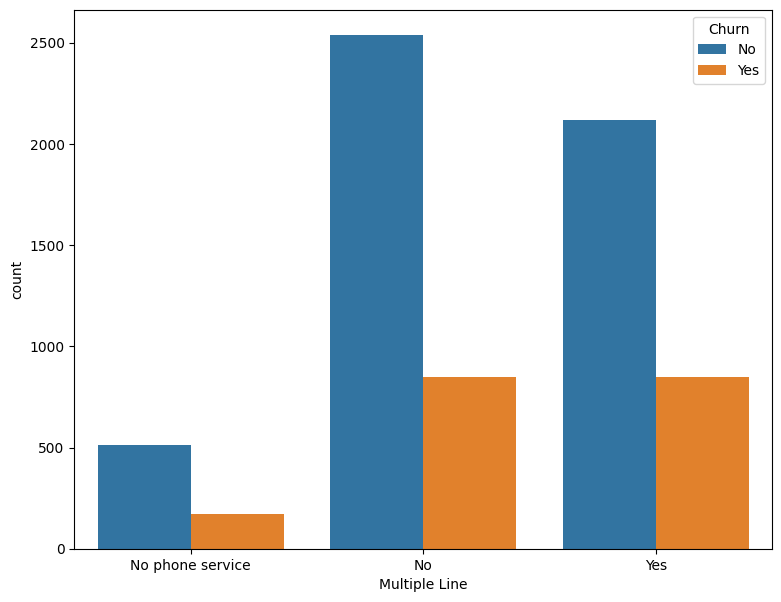

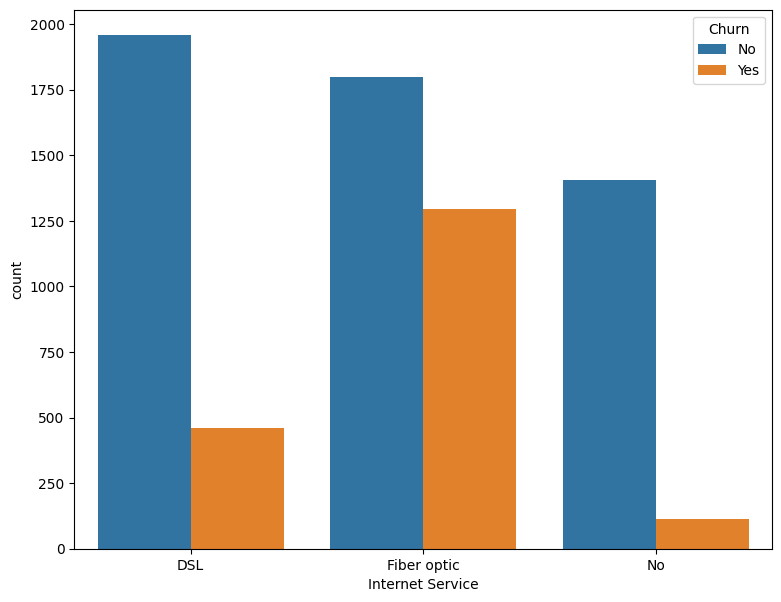

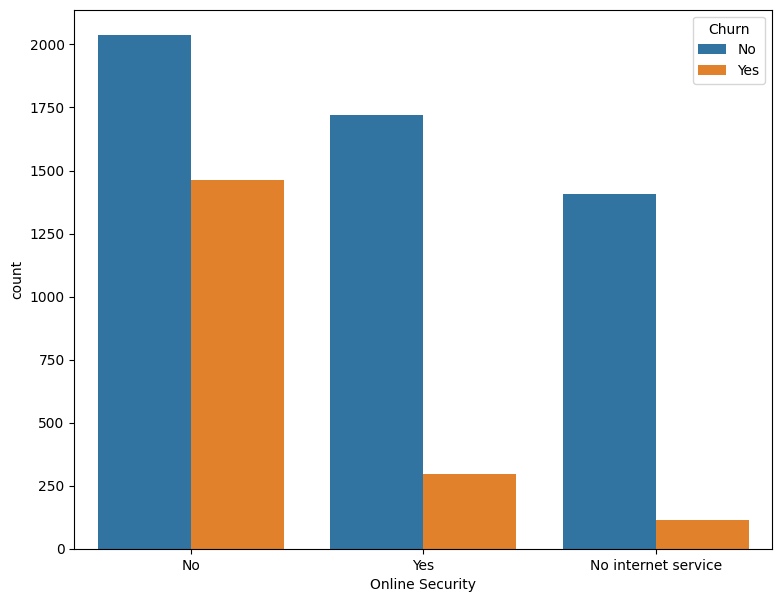

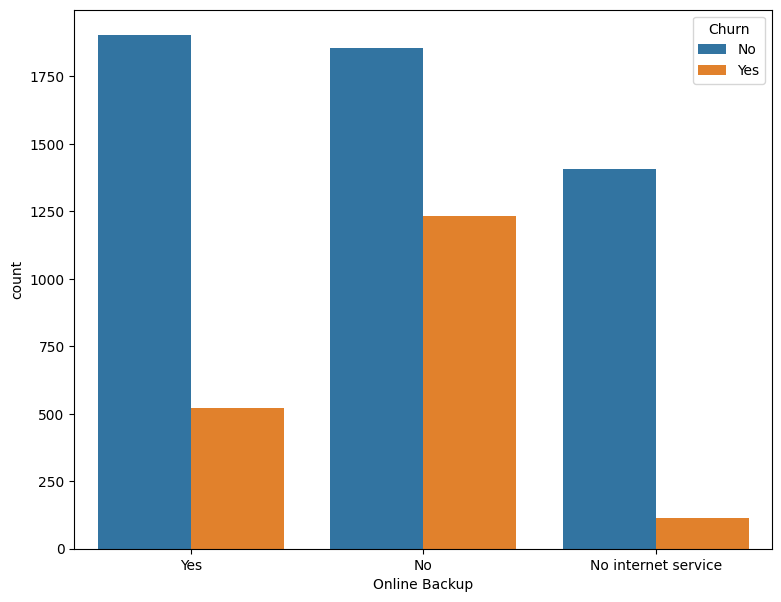

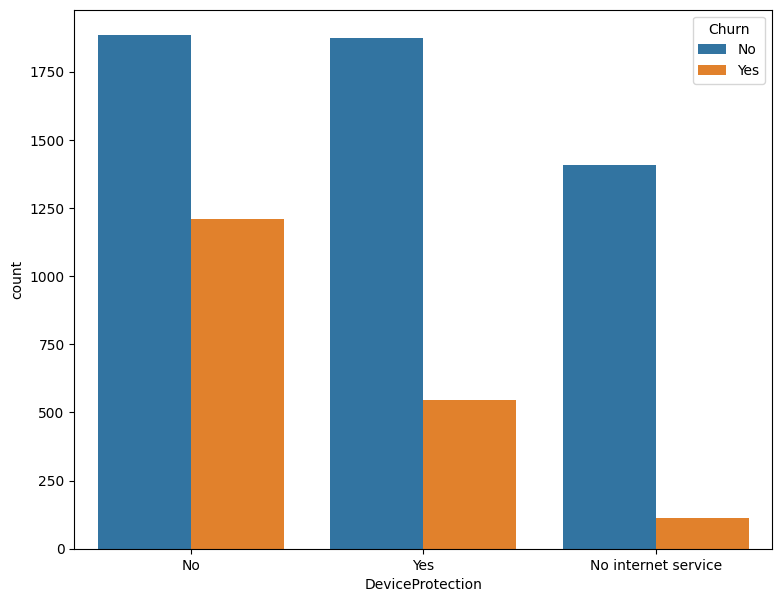

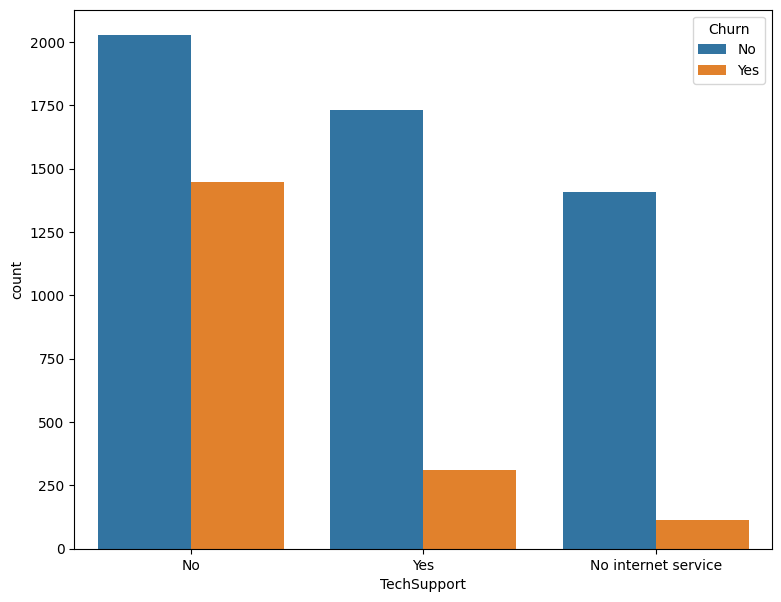

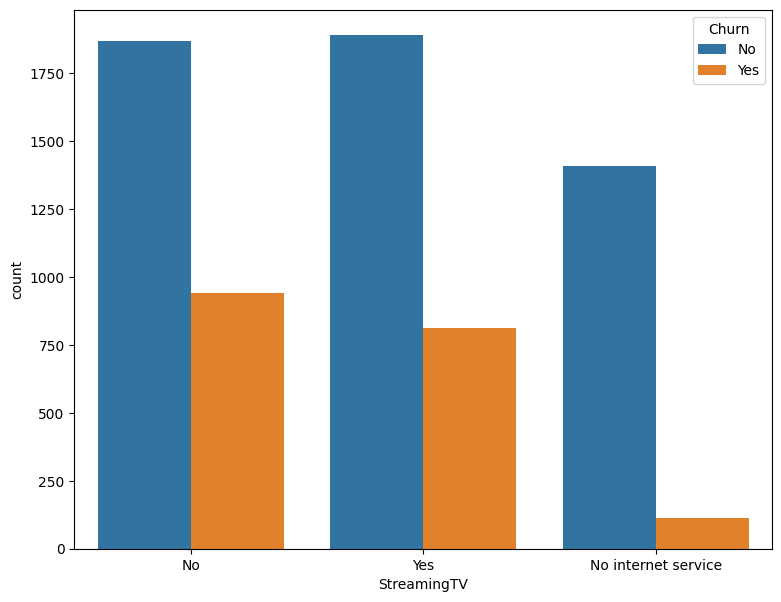

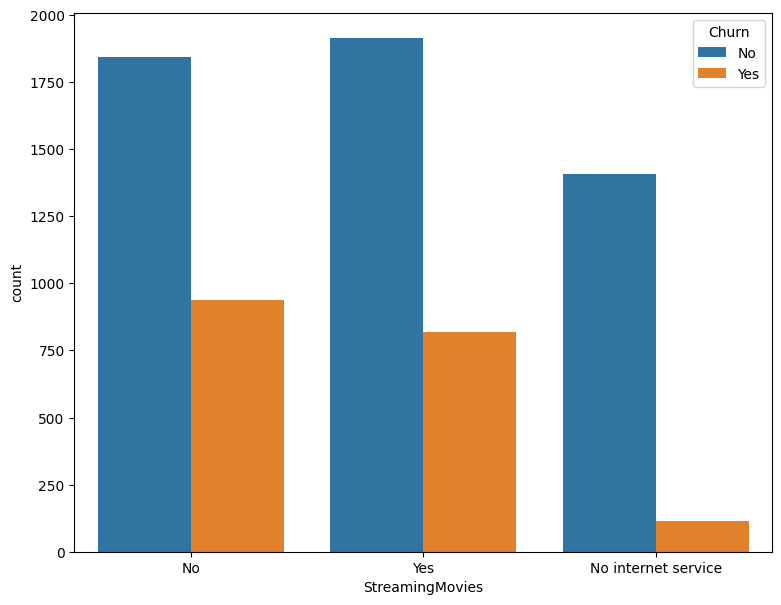

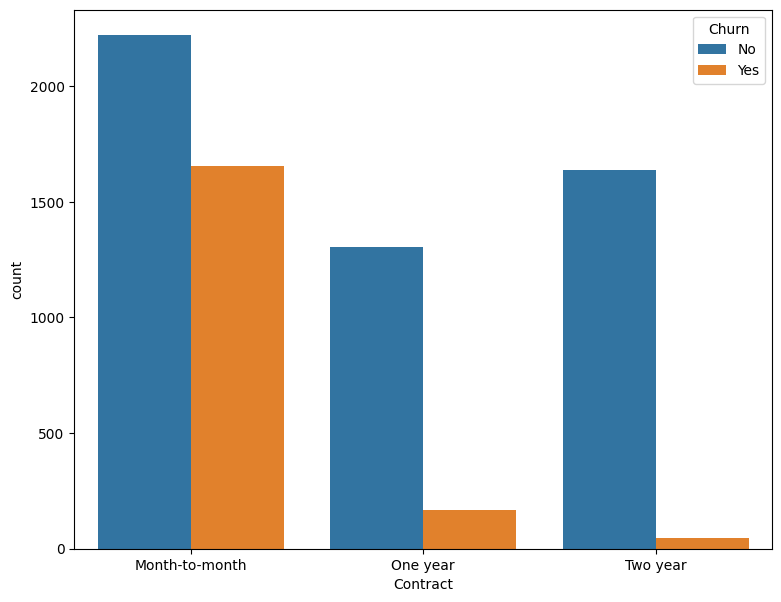

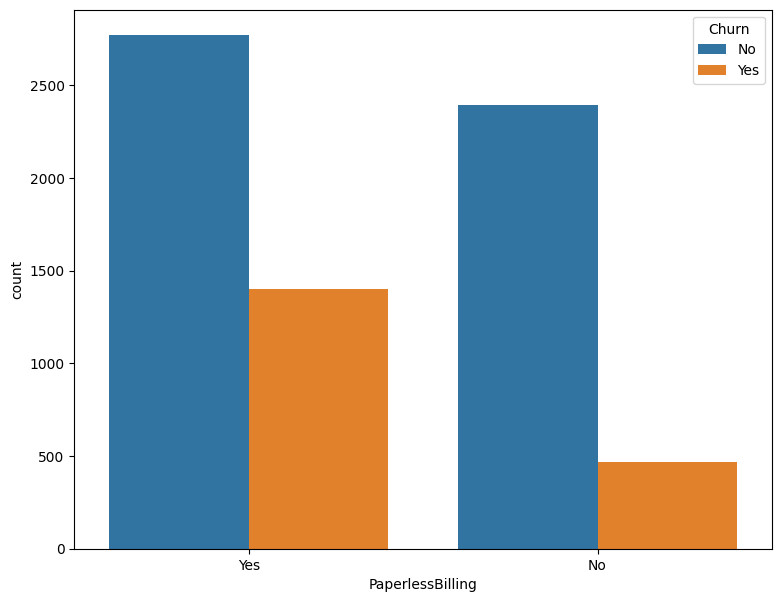

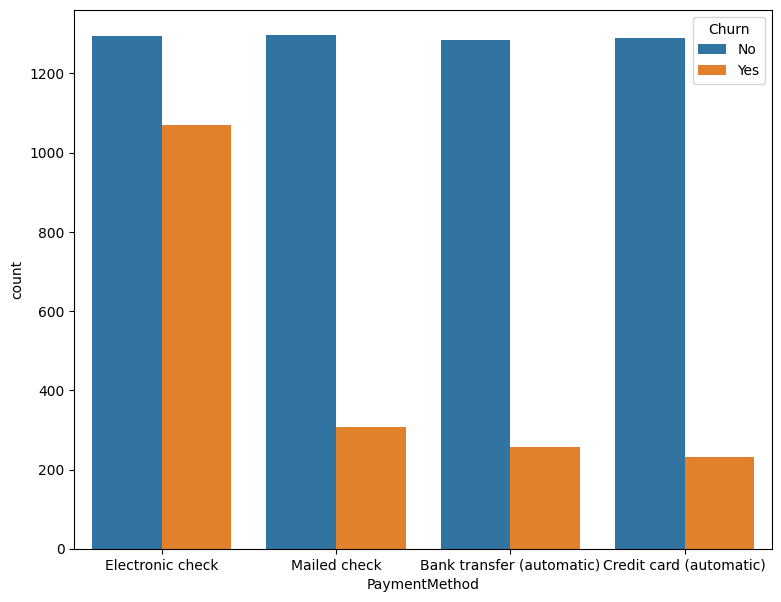

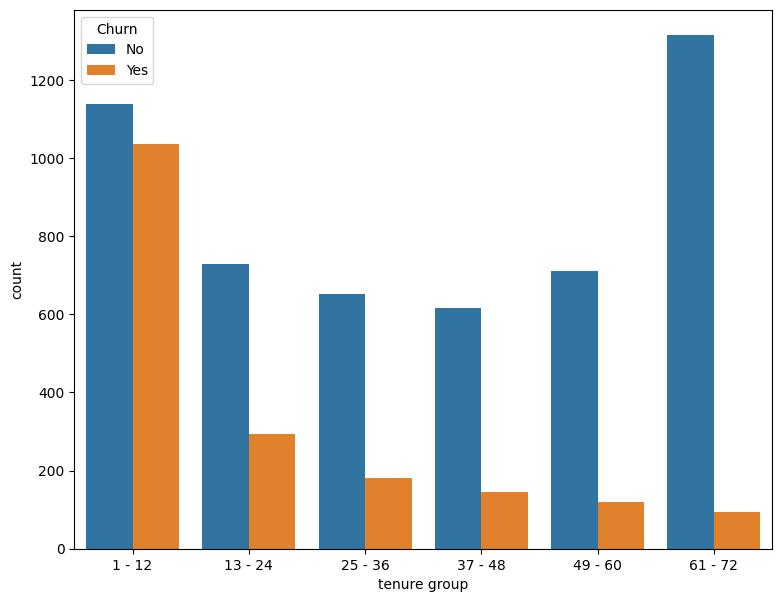

In [23]:
# Set the figsize for the charts
figsize = (9, 7)

for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'Tenure'])):
    plt.figure(i, figsize=figsize)
    plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    sns.countplot(data=df, x=predictor, hue='Churn')

In [ ]:
df.columns

In [ ]:
df.info()

## Feature engineering

In [24]:
df =df[['Phone Service', 'Multiple Line', 'Internet Service', 'Online Security',
       'Online Backup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges','Gender', 'Senior Citizen', 'Partner', 'Dependents','tenure group','Churn']]

In [25]:
df['Churn'] = df['Churn'].replace({'Yes':1, 'No':0})

In [26]:
df.dtypes

Phone Service         object
Multiple Line         object
Internet Service      object
Online Security       object
Online Backup         object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
tenure group        category
Churn                  int64
dtype: object

In [27]:
df.head()

,Phone Service,Multiple Line,Internet Service,Online Security,Online Backup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,Senior Citizen,Partner,Dependents,tenure group,Churn
0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,No,Yes,No,1 - 12,0
1,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,Male,No,No,No,25 - 36,0
2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Male,No,No,No,1 - 12,1
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,No,No,No,37 - 48,0
4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Female,No,No,No,1 - 12,1


In [28]:
#Assign input and output 
x = df.iloc[:,:-1] 
y = df.iloc[:,-1] 

In [29]:
x['tenure group'] = x['tenure group'].astype(object)

In [30]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Phone Service     7032 non-null   object 
 1   Multiple Line     7032 non-null   object 
 2   Internet Service  7032 non-null   object 
 3   Online Security   7032 non-null   object 
 4   Online Backup     7032 non-null   object 
 5   DeviceProtection  7032 non-null   object 
 6   TechSupport       7032 non-null   object 
 7   StreamingTV       7032 non-null   object 
 8   StreamingMovies   7032 non-null   object 
 9   Contract          7032 non-null   object 
 10  PaperlessBilling  7032 non-null   object 
 11  PaymentMethod     7032 non-null   object 
 12  MonthlyCharges    7032 non-null   float64
 13  TotalCharges      7032 non-null   float64
 14  Gender            7032 non-null   object 
 15  Senior Citizen    7032 non-null   object 
 16  Partner           7032 non-null   object 
 17  

In [31]:
#Partioning dataset. Due to inbalance dataset value, use stratified sampling
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42,stratify = y)

In [32]:
# Create Column Transformer with 3 types of transformers
num_features = x_train.select_dtypes(exclude="object").columns
cat_features = x_train.select_dtypes(include="object").columns

In [ ]:
x_train.info()

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


le = LabelEncoder()

x_train = x_train[cat_features].apply(le.fit_transform)


In [33]:
# Preprocessing of train data

from sklearn.preprocessing import StandardScaler, LabelEncoder

num_features = x_train.select_dtypes(exclude="object").columns
cat_features = x_train.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
le = LabelEncoder()

# Encoding categorical features
for feature in cat_features:
    x_train[feature] = le.fit_transform(x_train[feature])

# Scaling numeric features
x_train[num_features] = numeric_transformer.fit_transform(x_train[num_features])


In [38]:
# Preprocessing of test data

num_features_test = x_test.select_dtypes(exclude="object").columns
cat_features_test = x_test.select_dtypes(include="object").columns

# Encoding categorical features
for feature in cat_features_test:
    x_test[feature] = le.fit_transform(x_test[feature])

# Scaling numeric features
x_test[num_features_test] = numeric_transformer.fit_transform(x_test[num_features_test])

In [39]:
x_test

,Phone Service,Multiple Line,Internet Service,Online Security,Online Backup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,Senior Citizen,Partner,Dependents,tenure group
4221,1,0,2,1,1,1,1,1,1,0,0,1,-1.529293,-1.001488,1,0,0,0,0
1820,1,0,0,0,0,0,0,0,0,0,0,3,-0.641519,-0.865739,0,0,1,0,0
2375,1,0,1,2,2,2,2,2,2,2,1,0,1.516429,2.517729,0,1,1,0,5
5462,1,2,0,0,2,0,2,0,2,1,1,3,0.183926,0.989727,1,0,1,0,5
1791,1,0,0,2,2,2,0,0,0,1,1,3,-0.107507,0.204872,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,1,2,1,0,2,2,2,2,2,2,1,1,1.489476,1.156473,0,0,1,0,3
4768,1,0,2,1,1,1,1,1,1,2,0,1,-1.512447,-0.390408,1,1,1,1,5
6150,1,0,1,0,0,0,0,2,2,0,0,2,0.888081,0.271508,1,0,0,0,2
3234,1,0,2,1,1,1,1,1,1,2,0,3,-1.515816,-0.808119,0,0,1,1,1


In [40]:
x_train

,Phone Service,Multiple Line,Internet Service,Online Security,Online Backup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,Senior Citizen,Partner,Dependents,tenure group
4499,1,2,1,2,0,0,0,0,0,0,1,2,0.444749,-0.607066,0,0,0,1,0
1933,1,0,2,1,1,1,1,1,1,1,1,3,-1.492135,-0.823672,1,0,0,0,1
4668,1,0,0,2,0,0,0,0,2,0,1,1,-0.120451,-0.950975,0,0,0,1,0
5681,1,0,0,0,0,2,2,2,0,1,0,0,-0.021293,-0.081500,0,1,1,0,2
3610,1,2,1,0,0,2,0,2,2,0,1,0,1.166949,-0.495086,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5161,1,0,0,0,2,0,2,0,0,0,0,2,-0.353472,-0.430041,1,0,0,1,1
3451,1,0,1,0,0,0,0,0,0,1,1,0,0.201812,0.993692,1,1,1,0,5
4135,1,2,0,2,2,2,2,2,2,2,1,1,0.927318,0.477390,0,0,1,1,2
4249,1,0,0,0,2,2,0,0,2,1,1,3,0.034897,-0.716478,0,0,1,1,0


In [41]:
# Label encoding target variable 
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [42]:
#####Train Logistic Regression Algorithm

#Import LogisticRegression() function
from sklearn.linear_model import LogisticRegression

#Create a Logistic Regression classifier
class_model = LogisticRegression(random_state=0)

#Train the Logistic Regression algorithm using train set
class_model.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [43]:
#Apply model
y_pred=class_model.predict(x_test)

In [44]:
#Dataframe of Predicted Output and Actual Output for Test set
df_validate = pd.DataFrame({'Actual':y_test,'Predicted':y_pred}) #Create Data Frame
df_validate['Predicted']=df_validate['Predicted']
df_validate.tail()

,Actual,Predicted
2105,0,0
2106,0,0
2107,0,1
2108,0,0
2109,0,1


In [45]:
pd.crosstab(y_pred,y_test)

col_0,0,1
row_0,,
0,1366,250
1,183,311


In [46]:
# Precision & Sensitivity/Recall Report
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1549
           1       0.63      0.55      0.59       561

    accuracy                           0.79      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.79      0.79      2110



## Random Forest Classifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10)
model = rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [5,10,15,25,50,100,200,400]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

In [ ]:
#rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=4,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

In [ ]:
rf_randomcv.best_params_

In [ ]:
best_random_grid=rf_randomcv.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

## Grid search cv

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 
    'max_features': ['auto', 'sqrt', 'log2'], 
    'max_depth': [5, 10, 15, 25, 50, 100, 200, 400], 
    'min_samples_split': [2, 5, 10, 14], 
    'min_samples_leaf': [1, 2, 4, 6, 8], 
    'criterion': ['entropy', 'gini']    
}

print(param_grid)

In [ ]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=2,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

## Decision Tree Classifer

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [ ]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model_dt.fit(x_train,y_train)


In [ ]:
y_pred=model_dt.predict(x_test)
y_pred


In [ ]:
model_dt.score(x_test,y_test)


In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.
Hence, moving ahead to call SMOTEENN (UpSampling + ENN)


In [ ]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x_processed,y)

In [ ]:
# resampled
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)


In [ ]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
from sklearn import metrics
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

## Random Forest (from tutorial)

In [47]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [48]:
model_rf.fit(x_train,y_train)


RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [49]:
y_pred=model_rf.predict(x_test)


In [50]:
model_rf.score(x_test,y_test)


0.7819905213270142

In [51]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_test, y_pred, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1549
           1       0.63      0.44      0.52       561

    accuracy                           0.78      2110
   macro avg       0.72      0.67      0.69      2110
weighted avg       0.77      0.78      0.77      2110



In [54]:
import pickle

In [55]:
filename = 'churn_predict.pkl'


In [56]:
pickle.dump(model_rf, open(filename, 'wb'))

In [ ]:
load_model = pickle.load(open(filename, 'rb'))


In [57]:
# load model

loaded_model = pickle.load(open('churn_predict.pkl', 'rb'))

In [58]:
loaded_model

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [62]:
input_data = (80,1000.00,1,1,1,1,0,0,1,0,0,1,1,0,1,1,1,0,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not churn')
else:
  print('The person is churn')

[0]
The person is not churn


In [ ]:
input_data = (65.00,130.00,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not churn')
else:
  print('The person is churn')

In [70]:
list(x_train.columns)

['Phone Service',
 'Multiple Line',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'tenure group']

In [64]:
x_train.head()

,Phone Service,Multiple Line,Internet Service,Online Security,Online Backup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,Senior Citizen,Partner,Dependents,tenure group
4499,1,2,1,2,0,0,0,0,0,0,1,2,0.444749,-0.607066,0,0,0,1,0
1933,1,0,2,1,1,1,1,1,1,1,1,3,-1.492135,-0.823672,1,0,0,0,1
4668,1,0,0,2,0,0,0,0,2,0,1,1,-0.120451,-0.950975,0,0,0,1,0
5681,1,0,0,0,0,2,2,2,0,1,0,0,-0.021293,-0.081500,0,1,1,0,2
3610,1,2,1,0,0,2,0,2,2,0,1,0,1.166949,-0.495086,0,0,0,0,0


In [69]:
x_train['DeviceProtection'].value_counts()

DeviceProtection
0    2150
2    1698
1    1074
Name: count, dtype: int64